# 第5章 配列生成

In [1]:
import numpy as np

## 40. 指定したN個の要素を持つ配列(要素は0から N-1 までの整数)をを生成するジェネレータ関数を定義し実行せよ

In [3]:
def generate(N):
    for x in range(N):
        yield x

In [4]:
for i in generate(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [6]:
A = np.fromiter(generate(10),dtype=float)
print(A)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


## 41. sizeが10の0から1の実数配列を生成せよ。(ただし、0と1は除く)

In [7]:
np.linspace(0,1,12)[1:-1]

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091])

In [17]:
np.linspace(0,1,11,endpoint=False)[1:]

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091])

## 42. サイズ10の乱数ベクトルを生成し、昇順ソートせよ

In [21]:
%timeit np.sort(np.random.random(1000000))

572 ms ± 1.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
np.sort(np.random.random(1000000))

array([2.62300646e-06, 5.53280072e-06, 9.99255139e-06, ...,
       9.99998012e-01, 9.99998607e-01, 9.99999626e-01])

## 43. 小さいサイズの配列で np.sumよりも高速にsumせよ

In [28]:
a = np.arange(10)
# ufuncによる演算を連続で適用
%timeit np.add.reduce(a)
# C実装のufunc
%timeit np.sum(a)

13.8 µs ± 543 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
40.5 µs ± 320 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
a = np.arange(10000)
# ufuncによる演算を連続で適用
%timeit np.add.reduce(a)
# C実装のufunc
%timeit np.sum(a)

44.9 µs ± 79.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
72 µs ± 338 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 44. 整数配列AとBが等しいかどうかを判定せよ

In [67]:
A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)

print(A)
print(B)

# 全ての要素が等しいか判定、 np.all()はスカラーとの比較もOK
%timeit eq = np.all(A==B)

#全ての要素が等しいか判定
%timeit np.array_equal(A,B)

[1 1 0 0 1]
[1 0 0 1 1]
24.7 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
26.3 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [68]:
print(np.array_equal(A,B))

# すべての要素が近いか判定 (同じ位置にNANあってもOK)
%timeit np.allclose(A,B,equal_nan=True)
print(np.allclose(A,B,equal_nan=True))

False
211 µs ± 4.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
False


In [70]:
A = np.array([1,np.nan,2])
B = np.array([1,np.nan,2])
print(A)
print(B)

#全ての要素が等しいか判定, np.all()はスカラーとの比較OK
%timeit eq = np.all(A==B)
print(np.all(A==B))

#すべての要素が近いか判定 (同じ位置にNANあってもOK)
%timeit np.allclose(A,B,equal_nan=True)
print(np.allclose(A,B,equal_nan=True))

[ 1. nan  2.]
[ 1. nan  2.]
25 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
False
331 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
True


## 45. イミュータブル(変更不可)な配列を作れ

In [73]:
a = np.array([3,1,4,1,5,9,2,6,5,3])
a.flags.writeable = False
a[0] = 4;

ValueError: assignment destination is read-only

## 46. 直交座標(xy)から極座標(r,θ)へ変換せよ

In [1]:
#cartesian coordinates: 直交座標 (x,y)から polar coordinates 極座標(r,θ)へ
import numpy as np
import math

# cartesian
a = np.random.random((10,2))
x = a[:,0]
y = a[:,1]
# convert to polar(r^2 = x^2 + y^2, tanθ = y/x)
r = np.sqrt(x**2 + y**2)
theta = []
for x1,y1 in zip(x,y):  # zip()  xとyのペアを作成(タプル型で返される)
    theta.append(math.atan(y1/x1))
    
print(r)
print(theta)

[1.0504908  0.62050399 0.99321586 0.60687588 0.94885687 0.81710604
 0.89857815 0.57002915 0.64202409 0.97462419]
[0.8686057293276546, 0.20947877311988375, 1.0606259642645, 0.34492292991287704, 1.1248295208084378, 0.7856830573189709, 0.15270458111645957, 0.20703472790189945, 0.6427935816658998, 0.4991624877447513]


In [3]:
X, Y = a[:,0],a[:,1]
R = np.sqrt(X**2 + Y**2)
T = np.arctan2(Y,X)
print(R)
print(T)

[1.0504908  0.62050399 0.99321586 0.60687588 0.94885687 0.81710604
 0.89857815 0.57002915 0.64202409 0.97462419]
[0.86860573 0.20947877 1.06062596 0.34492293 1.12482952 0.78568306
 0.15270458 0.20703473 0.64279358 0.49916249]


In [7]:
a

array([[0.67850318, 0.80197528],
       [0.60693942, 0.12903386],
       [0.48501305, 0.86674107],
       [0.57113181, 0.20519939],
       [0.40927074, 0.85605304],
       [0.57761659, 0.57794581],
       [0.88812166, 0.13668433],
       [0.55785604, 0.11717454],
       [0.51389169, 0.38485096],
       [0.85570423, 0.46654323]])

In [ ]:
print(math.a)

## 47. サイズ10の乱数配列を作り最大値の要素を0に置き換え置き換えよ

In [16]:
np.random.seed(5)
a = np.random.random(10)
print(a)
print(np.argmax(a))
print(np.max(a))
a[np.argmax(a)] = 0
print(a)

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]
3
0.9186109079379216
[0.22199317 0.87073231 0.20671916 0.         0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


## 48. (x,y) = (0,0) から (1,1) までの等間隔の格子列で埋める構造配列を定義せよ

In [23]:
a = np.zeros((100, 100), [('x',float),('y',float)])
a['x'],a['y'] = np.meshgrid(np.linspace(0,1,100), np.linspace(0,1,100))
print(a)

[[(0.        , 0.        ) (0.01010101, 0.        )
  (0.02020202, 0.        ) ... (0.97979798, 0.        )
  (0.98989899, 0.        ) (1.        , 0.        )]
 [(0.        , 0.01010101) (0.01010101, 0.01010101)
  (0.02020202, 0.01010101) ... (0.97979798, 0.01010101)
  (0.98989899, 0.01010101) (1.        , 0.01010101)]
 [(0.        , 0.02020202) (0.01010101, 0.02020202)
  (0.02020202, 0.02020202) ... (0.97979798, 0.02020202)
  (0.98989899, 0.02020202) (1.        , 0.02020202)]
 ...
 [(0.        , 0.97979798) (0.01010101, 0.97979798)
  (0.02020202, 0.97979798) ... (0.97979798, 0.97979798)
  (0.98989899, 0.97979798) (1.        , 0.97979798)]
 [(0.        , 0.98989899) (0.01010101, 0.98989899)
  (0.02020202, 0.98989899) ... (0.97979798, 0.98989899)
  (0.98989899, 0.98989899) (1.        , 0.98989899)]
 [(0.        , 1.        ) (0.01010101, 1.        )
  (0.02020202, 1.        ) ... (0.97979798, 1.        )
  (0.98989899, 1.        ) (1.        , 1.        )]]


## 49. X,Y　の２つの配列についてコーシー行列(Cauchy Matrix) $ C_{ij} = \frac{1}{x_i - y_j} $ を構築せよ

In [27]:
x = np.arange(8)
y = np.arange(11, 19)
l = []

for i in x:
    tmp = []
    for j in y:
        tmp.append(1/(i-j))
    l.append(tmp)
print(np.array(l))

[[-0.09090909 -0.08333333 -0.07692308 -0.07142857 -0.06666667 -0.0625
  -0.05882353 -0.05555556]
 [-0.1        -0.09090909 -0.08333333 -0.07692308 -0.07142857 -0.06666667
  -0.0625     -0.05882353]
 [-0.11111111 -0.1        -0.09090909 -0.08333333 -0.07692308 -0.07142857
  -0.06666667 -0.0625    ]
 [-0.125      -0.11111111 -0.1        -0.09090909 -0.08333333 -0.07692308
  -0.07142857 -0.06666667]
 [-0.14285714 -0.125      -0.11111111 -0.1        -0.09090909 -0.08333333
  -0.07692308 -0.07142857]
 [-0.16666667 -0.14285714 -0.125      -0.11111111 -0.1        -0.09090909
  -0.08333333 -0.07692308]
 [-0.2        -0.16666667 -0.14285714 -0.125      -0.11111111 -0.1
  -0.09090909 -0.08333333]
 [-0.25       -0.2        -0.16666667 -0.14285714 -0.125      -0.11111111
  -0.1        -0.09090909]]


In [28]:
x = np.arange(8)
y = np.arange(11, 19)
c = 1 / np.subtract.outer(x,y)
print(c)

[[-0.09090909 -0.08333333 -0.07692308 -0.07142857 -0.06666667 -0.0625
  -0.05882353 -0.05555556]
 [-0.1        -0.09090909 -0.08333333 -0.07692308 -0.07142857 -0.06666667
  -0.0625     -0.05882353]
 [-0.11111111 -0.1        -0.09090909 -0.08333333 -0.07692308 -0.07142857
  -0.06666667 -0.0625    ]
 [-0.125      -0.11111111 -0.1        -0.09090909 -0.08333333 -0.07692308
  -0.07142857 -0.06666667]
 [-0.14285714 -0.125      -0.11111111 -0.1        -0.09090909 -0.08333333
  -0.07692308 -0.07142857]
 [-0.16666667 -0.14285714 -0.125      -0.11111111 -0.1        -0.09090909
  -0.08333333 -0.07692308]
 [-0.2        -0.16666667 -0.14285714 -0.125      -0.11111111 -0.1
  -0.09090909 -0.08333333]
 [-0.25       -0.2        -0.16666667 -0.14285714 -0.125      -0.11111111
  -0.1        -0.09090909]]


In [34]:
print(x)
print(y)
print(np.outer(x,y))  ## 外積(テンソル積・　outer)  ※ベクトルの外積はクロス積　cross product
print(np.subtract(x,y))
print(np.subtract.outer(x,y))

# [[  0-11,   0-12,   0-13,   0-14,   0-15,   0-16,   0-17,   0-18],
#  [  1-11,   1-12,   1-13,   1-14,   1-15,   1-16,   1-17,   1-18],
#  [  2-11,   2-12,   2-13,   2-14,   2-15,   2-16,   2-17,   2-18],
#  [  3-11,   3-12,   3-13,   3-14,   3-15,   3-16,   3-17,   3-18],
#  [  4-11,   4-12,   4-13,   4-14,   4-15,   4-16,   4-17,   4-18],
#  [  5-11,   5-12,   5-13,   5-14,   5-15,   5-16,   5-17,   5-18],
#  [  6-11,   6-12,   6-13,   6-14,   6-15,   6-16,   6-17,   6-18],
#  [  7-11,   7-12,   7-13,   7-14,   7-15,   7-16,   7-17,   7-18]]


[0 1 2 3 4 5 6 7]
[11 12 13 14 15 16 17 18]
[[  0   0   0   0   0   0   0   0]
 [ 11  12  13  14  15  16  17  18]
 [ 22  24  26  28  30  32  34  36]
 [ 33  36  39  42  45  48  51  54]
 [ 44  48  52  56  60  64  68  72]
 [ 55  60  65  70  75  80  85  90]
 [ 66  72  78  84  90  96 102 108]
 [ 77  84  91  98 105 112 119 126]]
[-11 -11 -11 -11 -11 -11 -11 -11]
[[-11 -12 -13 -14 -15 -16 -17 -18]
 [-10 -11 -12 -13 -14 -15 -16 -17]
 [ -9 -10 -11 -12 -13 -14 -15 -16]
 [ -8  -9 -10 -11 -12 -13 -14 -15]
 [ -7  -8  -9 -10 -11 -12 -13 -14]
 [ -6  -7  -8  -9 -10 -11 -12 -13]
 [ -5  -6  -7  -8  -9 -10 -11 -12]
 [ -4  -5  -6  -7  -8  -9 -10 -11]]


[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669]


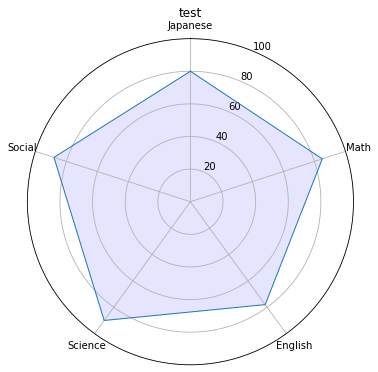

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# データの準備
data = {
    'subject': ['Japanese', 'Math', 'English', 'Science', 'Social'],
    'score': [80, 85, 78, 90, 88]
}

df = pd.DataFrame(data)

# 5教科の項目
categories = df['subject'].tolist()
N = len(categories)

# 各項目に対応する角度
angles = [n / float(N) * 2 * pi for n in range(N)]
print(angles)
angles += angles[:1]  # 最後の点を最初の点と同じにするために追加

# レーダーチャート用データ
values = df['score'].tolist()
values += values[:1]  # 最初の点と最後の点を結ぶ

# プロットの作成
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# チャートのラベル
ax.set_theta_offset(pi / 2)  # チャートの開始角度を調整
ax.set_theta_direction(-1)   # 時計回りにする

# 各ラベルの配置
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# 値の範囲を指定
ax.set_ylim(0, 100)

# プロット
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'b', alpha=0.1)  # 塗りつぶし

# グラフ表示
plt.title('test')
plt.show()


In [43]:
angles = [n / float(N) * 2 * np.pi for n in range(N)]
print(angles)

[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669]


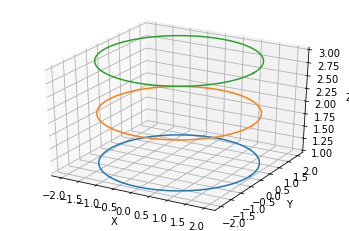

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 円周上の点を計算
theta = np.linspace(0, 2 * np.pi, 100)  # 角度
r = 2  # 半径は2 (x^2 + y^2 = 4)

# x, y 座標を極座標から計算
x = r * np.cos(theta)
y = r * np.sin(theta)

# z の高さのリスト
z_values = [1, 2, 3]

# 3Dプロットを作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 各zに対して円を描画
for z in z_values:
    ax.plot(x, y, zs=z)

# ラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# グラフを表示
plt.show()


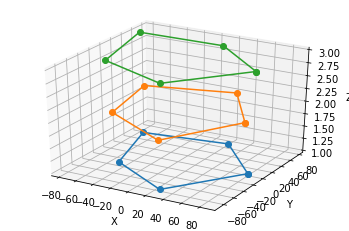

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 5教科の点数データ（各Z値に対応する）
scores = {
    1: [80, 70, 90, 60, 85],  # z=1 の教科の点数
    2: [75, 80, 85, 65, 90],  # z=2 の教科の点数
    3: [85, 60, 95, 70, 80],  # z=3 の教科の点数
}

# 5教科に対応する軸の角度（レーダーチャートの頂点）
labels = ['Math', 'Science', 'English', 'History', 'Art']
num_vars = len(labels)

# 各軸の角度を計算
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # レーダーチャートを閉じるために最初の点に戻る

# 3Dプロットの作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 各 z 軸に対応するレーダーチャートを描画
for z in scores:
    # スコアデータを取得し、最初の点に戻る
    score = scores[z] + scores[z][:1]

    # レーダーチャートの x, y 座標を計算
    x = [s * np.cos(angle) for s, angle in zip(score, angles)]
    y = [s * np.sin(angle) for s, angle in zip(score, angles)]

    # レーダーチャートをプロット
    ax.plot(x, y, zs=z, label=f'z={z}', marker='o')

# ラベルを設定
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# グラフを表示
plt.show()
